# 4.1 Regresión logística

## Introducción

En este Notebook vamos a analizar el funcionamiento del algoritmo de [regresión logística](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) 

La receta es la siguiente, usarlo si tenemos muchos datos, recordad que proporciona probabilidad de prediccion


## Regresión logística

El algoritmo de regresión logística intenta predecir la probabilidad de que una observación dada pertenezca a una cierta clase (categoría). Supongamos un problema con dos clases únicamente (problema binario), la regresión logística da como resultado la siguiente probabilidad:

$$
P\left[ \ y = 1\ |\ \mathbf{x}\ \right]
$$

de tal forma que la probabilidad de pertenencia a la otra clase es: 

$$
P\left[\ y = 0\ |\ \mathbf{x}\ \right] = 1 - P\left[\ y = 1\ |\ \mathbf{x}\ \right]
$$

Por lo que la salida de nuestro modelo de regresión logística debe estar comprendido en el lintervalo $[0,1]$.

La regresión logística asume que podemos utilizar una frontera lineal para separar el espacio de observaciones en dos regiones, una por cada clase. Supongamos que tenemos una problem bi-dimensional, en el que nuestras observaciones están determinadas por un vector de dos dimensiones, por ejemplo $\mathbf{x} = [x_1, x_2]^T$. Una frontera de separación lineal en el plano 2D está definido por la ecuación de una recta, que podemos escribir como

$$h(\mathbf{x}) = \omega_0 + \omega_1 x_1 + \omega_2 x_2,$$

que expresado en notación vectorial quedaría

$$\boldsymbol{\omega}^T \mathbf{x} = 0.$$

Supongamos tenemos una nueva observación en este espacio bi-dimensional, que denotamos por $\mathbf{x}^* = [x^*_1,x_2^*]$. Cuando evaluamos esta nueva observación con respecto a la frontera lineal definida $h(\mathbf{x})$, se pueden dar tres posibilidades:

1. $\mathbf{x}^*$ se encuentra en la región de la clase positiva ($y = 1$). De esta forma $h(\mathbf{x}^*) > 0$. Cuanto mayor sea el valor del $|h(\mathbf{x}^*)|$, más lejos se encontrará el punto de la frontera.

2. $\mathbf{x}^*$ se encuentra en la región de la clase negativa ($y = 0$). De esta forma $h(\mathbf{x}^*) < 0$. Cuanto mayor sea el valor del $|h(\mathbf{x}^*)|$, más lejos se encontrará el punto de la frontera.

3. $\mathbf{x}^*$ se encuentra en exactamente en la frontera. De esta forma $h(\mathbf{x}^*) = 0$.
    
Sin embargo, tal y como hemos dicho, necesitamos convertir este valor de $h(\mathbf{x})$ en una probabilidad, es decir en un valor entre $[0,1]$, que además conserve las propiedades de $h(\mathbf{x})$. En concreto, si estamos estimando la probabilidad de pertenecer a la clase positiva ($y = 1$), que el valor sea más cercano a 1 cuanto mayor sea el valor de $h(\mathbf{x})$, que sea $0.5$ cuando $h(\mathbf{x}) = 0$ y que sea cercano a 0 cuanto menor sea $h(\mathbf{x})$. El objetivo actual es, pues, econtrar una transformación $\theta(z)$, tal que:

$$P\left[ \ y = 1\ |\ \mathbf{x}\ \right] = \theta\left(h(\mathbf{x})\right) = \theta\left(\mathbf{w}^T\mathbf{x}\right)$$

y que cumpla con todos los requisitos que hemos impuesto anteriormente. Existen varias funciones $\theta(z)$ que servirían a nuestro propósito. Una de ellas, la empeleada para la regresión logística es la que se conoce como **función sigmoide** o **función logística**, cuya expresión es

$$\theta(z) = \frac{1}{1 + e^{-z}}$$

Teniendo en cuenta que $z = \boldsymbol{\omega}^T\mathbf{x}$, la probabilidad de que una observación $\mathbf{x}$ pertenezca a la clase $C_1: y=1$ viene dada por:

$$P\left[ \ y = 1\ |\ \mathbf{x}\ \right] = \frac{1}{1+e^{-\boldsymbol{\omega}^T\mathbf{x}}}$$

y, consecuentemente, diremos que $\mathbf{x} \in C_1$ *sii* $P\left[ \ y = 1\ |\ \mathbf{x}\ \right] > 0.5$.

Una vez que hemos definido nuesto modelo, estimamos los coeficientes del modelo $\boldsymbol{\omega}$ definiendo el funcional verosimilitud, o *likelihood*, si bien esta demostración queda lejos de los contenidos de este curso.

## Medida de prestaciones

Una métrica de calidad que podemos usar para medir las prestaciones de un clasificador es el **error de clasificación**

$$\textrm{Error} = \frac{\textrm{# muestras mal clasificadas}}{\textrm{# de muestras total del problema}}$$

* Ejemplo: problema de clasificación con dos clases $y\in{0,1}$
    * Etiquetas reales (*y_true*) = $[1,0,0,1,0]$
    * Etiquetas predichas (*y_pred*) = $[0,0,1,1,0]$
    
    * En este caso: $$\textrm{Error} = \frac{\textrm{# muestras mal clasificadas} = 2}{\textrm{# de muestras total del problema} = 5} = \frac{2}{5} = 0.4$$

Así, el error de clasificación será un número entre 0 y 1, tal que:

* $\textrm{Error} = 0$ es el mejor valor posible (no me equivoco nada)
* $\textrm{Error} = 1$ es el peor valor posible (me equivoco en todas las muestras). Nota: si me equivoco en la clasificación de todas las muestras, entonces puedo interpretar que el clasificador es bueno, pero que tengo que hacer justo lo contrario de lo que me dice. El peor valor de error sería por tanto $0.5$, en el que la incertidumbre es mayor. 

Normalmente no se utiliza el error, sino su complementario, la exactitud o [**accuracy**](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) (Acc), que ya lo vimos:

$$\textrm{Acc} = 1 - \textrm{Error}$$

y entonces:

* $\textrm{Acc} = 1$ es el mejor valor posible (no me equivoco nada)
* $\textrm{Acc} = 0$ es el peor valor posible (me equivoco en todas las muestras)


In [ ]:
# cargamos librerías necesarias
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
#Vamos a cambiar de problema, para que tengais mas muestras de lo que podemos hacer
#Cogemos un dataset con una combinación de noticias, son las 25 noticias mas relevantes que sucedieron ese dia
#Las etiquetas son 1 si el precio del stock sube, y 0 si el precio bajo, el stock es el Dow Jones industrial average

In [ ]:
# Read in the data
#data = pd.read_csv('Full_Data.csv', encoding = "ISO-8859-1")
data = pd.read_csv('Combined_News_DJIA.csv', encoding = "ISO-8859-1")
data.head(1)
data.tail(1)

In [ ]:
#proque hice esta particion basada en fechas
train = data[data['Date'] < '20150101']
test = data[data['Date'] > '20141231']

In [ ]:
#Hacemos una limpieza diferente, ejemplos mas reales de cuando trabajamos con textos

# Removing punctuations
slicedData= train.iloc[:,2:27]
slicedData.replace(to_replace="[^a-zA-Z]", value=" ", regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
slicedData.columns= new_Index
slicedData.head(5)

# Convertng headlines to lower case
for index in new_Index:
    slicedData[index]=slicedData[index].str.lower()
slicedData.head(1)

In [ ]:
headlines = []
for row in range(0,len(slicedData.index)):
    headlines.append(' '.join(str(x) for x in slicedData.iloc[row,0:25]))

In [ ]:
headlines[1]

In [ ]:
?CountVectorizer

In [ ]:
#Nos ayuda a tokenizar y determinar la frecuencia de las palabras
#ver http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
#Text preprocessing, tokenizing and filtering of stopwords are included in a high level 
#component that is able to build a dictionary of features and transform documents to feature vectors
basicvectorizer = CountVectorizer(ngram_range=(1,1))
basictrain = basicvectorizer.fit_transform(headlines)
print(basictrain[0])

In [ ]:
basicmodel = LogisticRegression()
basicmodel = basicmodel.fit(basictrain, train["Label"])

In [ ]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
basictest = basicvectorizer.transform(testheadlines)
predictions = basicmodel.predict(basictest)

In [ ]:
predictions

In [ ]:
pd.crosstab(test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"])

In [ ]:
print(basictrain.shape)

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

print (classification_report(test["Label"], predictions))
print (accuracy_score(test["Label"], predictions))

In [ ]:
v = CountVectorizer(ngram_range=(1, 1))
print(v.fit(["an apple a day keeps the doctor away"]).vocabulary_)

In [ ]:
v = CountVectorizer(ngram_range=(2, 2))
print(v.fit(["an apple a day keeps the doctor away"]).vocabulary_)

In [ ]:
v = CountVectorizer(ngram_range=(3, 3))
print(v.fit(["an apple a day keeps the doctor away"]).vocabulary_)

In [ ]:
basicvectorizer2 = CountVectorizer(ngram_range=(2,2))
basictrain2 = basicvectorizer2.fit_transform(headlines)
basicmodel2 = LogisticRegression()
basicmodel2 = basicmodel2.fit(basictrain2, train["Label"])
basictest2 = basicvectorizer2.transform(testheadlines)
predictions2 = basicmodel2.predict(basictest2)
pd.crosstab(test["Label"], predictions2, rownames=["Actual"], colnames=["Predicted"])

In [ ]:
print(basictrain2.shape)
print (classification_report(test["Label"], predictions2))
print (accuracy_score(test["Label"], predictions2))

In [ ]:
#repetidlo con agrupaciones de 3 palabras y ver que tal funciona

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")
import numpy as np

In [23]:
data_path='../data/'
instrument='BTC'
data  = pd.read_csv(data_path+instrument+'.csv', names=['date','open','high','low','close','volume','market cap'], skiprows=1,index_col=0, parse_dates=True)
BTC=pd.DataFrame(data[["close"]])


instrument= "XRP"
data  = pd.read_csv(data_path+instrument+'.csv', names=['date','open','high','low','close','volume','market cap'], skiprows=1,index_col=0, parse_dates=True)
XRP=pd.DataFrame(data[["close"]])

instrument= "ETH"
data  = pd.read_csv(data_path+instrument+'.csv', names=['date','open','high','low','close','volume','market cap'], skiprows=1,index_col=0, parse_dates=True)
ETH=pd.DataFrame(data[["close"]])

instrument= "BCH"
data2  = pd.read_csv(data_path+instrument+'.csv', names=['date','open','high','low','close','volume','market cap'], skiprows=1,index_col=0, parse_dates=True)
BCH=pd.DataFrame(data[["close"]])


instrument= "LTC"
data  = pd.read_csv(data_path+instrument+'.csv', names=['date','open','high','low','close','volume','market cap'], skiprows=1,index_col=0, parse_dates=True)
LTC=pd.DataFrame(data[["close"]])

close= pd.concat([BTC, ETH,  XRP,BCH,LTC], axis=1)
close.columns= [ "BTC", "ETH",  "XRP","BCH","LTC"]
close=close.dropna()

In [24]:
def f(row):
    if row>0:
        return 1
    else:
        return -1
    
close = close.apply(lambda x: x - x.shift(1)) # shift moves dates back by 1.
close['y']=close['LTC'].apply(lambda x: f(x))
close.dropna(inplace=True)
close.head()

BTC       ETH       XRP       BCH   LTC  y
date                                                    
2015-08-08 -18.58 -2.016675  0.000324 -2.016675 -0.36 -1
2015-08-09   4.08 -0.051428  0.000332 -0.051428  0.05  1
2015-08-10  -0.61  0.006551 -0.000058  0.006551  0.05  1
2015-08-11   5.92  0.361552 -0.000159  0.361552  0.21  1
2015-08-12  -4.01  0.150000 -0.000320  0.150000 -0.17 -1

In [25]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):
	# setup marker generator and color map
	markers = ('s','x','o','^','v')
	colors = ('red','blue','lightgreen','gray','cyan')
	cmap = ListedColormap(colors[:len(np.unique(y))])

	# plot the decision surface
	x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
	x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

	xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max),
							np.arange(x2_min,x2_max))

	Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)

	Z = Z.reshape(xx1.shape)

	plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
	plt.xlim(xx1.min(),xx1.max())
	plt.ylim(xx2.min(),xx2.max())

	for idx, cl in enumerate(np.unique(y)):
		plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
			alpha=0.8, c=cmap(idx), marker=markers[idx],label=cl)
	if test_idx:
		X_test, y_test = X[test_idx,:], y[test_idx]
		plt.scatter(X_test[:, 0], X_test[:,1], c='',
			alpha=1.0, linewidth=1, marker='o',
			s=55, label='test set')

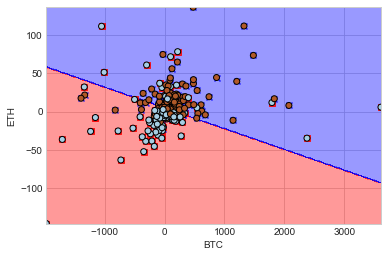

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
%matplotlib inline


X = close[['BTC','ETH']].values  # we only take the first two features.

y = close.y

logreg = linear_model.LogisticRegression()

logreg.fit(X, y)


plt.figure()
plot_decision_regions(X,y,logreg)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('BTC')
plt.ylabel('ETH')

plt.show()